# Exercise 2 Gradient Descent, Linear Regression and Logistic Regression

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Gradient Descent

For this who take numerical method already. The first half is sort of recap.

1) Where is the minimum for

$$f(x, y) = (x-2)^2 + (y-3)^2$$

x = 2,
y = 3

2) After this class and for the rest of your life(except for exam) use library like this unless the library doesn't do exactly what you want(which is rare).

In [12]:
def f(xs):
    x, y = xs #this is called variable unpacking. USE it to make your code look nicer
    return (x-2)**2 + (y-3)**2

f([1,2])

2

In [13]:
import scipy.optimize as opt
opt.fmin(f, [0,1])
# ?opt.fmin #bring up documentation

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 63
         Function evaluations: 123


3) Now let us understand the magic behind it. For $f(x,y)$ given above find the gradient at (1,2).

$$\nabla f(x, y) = 2(x-2)\hat{x} + 2(y-3) \hat{y}$$
$$\nabla f(1,2) = -2\hat{x} -2\hat{y}$$

4) Find the unit vector that has the same direction as the gradient

$$ \frac{\nabla f}{|\nabla f|} = \frac{-1}{\sqrt{2}} \times (\hat{x} + \hat{y}) $$

5) Which direction should we walk?

$$ \frac{1}{\sqrt{2}} \times (\hat{x} + \hat{y}) $$

6) How far should we walk? What is wrong with large step size and what is wrong with small step size?

<span style="color:red">Large step size -> Stepping over the minimum
<br/>Small step size -> Takes forever</span>

7) Where do we want large step size and where do we want small step size?

<span style="color:red">Far away from minimum -> Large step
<br/>Small step size -> Takes forever</span>

8) Given that we don't really know where the minimum is. How do we get a qunatity what has such behavior?

In [ ]:
Step

9) What is a learning rate? What is wrong with large learning rate and what is wrong with small learning rate?

10) Write down the "update rule"

$$\vec{x}_{i+1} = \vec{x}_{i} + \ldots $$

11) Given our update and learning rate of 0.01 rule compute the next guess ($\vec{x}_{1}$)

12) Compute ($\vec{x}_2$)

13) Compute ($\vec{x}_{100}$). Of course, don't do it by hands you have a computer for a reason.

In [12]:
xs = np.array([1, 2])
def f(xs):
    x, y = xs #this is called variable unpacking. USE it to make your code look nicer
    return (x-2)**2 + (y-3)**2
def df(xs):
    x, y = xs
#     return np.array([2*(x-2), 2*(y-3)])
    h = 1e-10
    dx = ( f(xs + np.array([h, 0])) - f(xs) ) / h
    dy = ( f(xs + np.array([0, h])) - f(xs) ) / h
    return np.array([dx, dy])
eta = 0.01
for i in xrange(500):
    xs = xs - eta*df(xs)

print xs

[ 1.99995898  2.99995898]


# Numerical Gradient

1) Previous example relies on analytical gradient which is not always available for us.

How do we compute gradient numerically? (If you recall, there are at least 2 methods. Do you remember what's the difference between the two?)

2) Find $\vec{x}_{100}$ by using numerical gradient.

# Linear Regression

1) Given a bunch of data. What is the difference between good hypothesis and bad hypothesis?

2) What parametrize each hypothesis?

3) What is padded feature? Write down the cost function with padded features.

4) What the variable we are trying to adjust?

5) What does $w_0$ represent and what does $w_1$ represent?

6) Fit this data. (use fmin if you want)

In [33]:
np.random.seed(12345)
n = 20
xs = np.linspace(1,3, n)
ys = 3*xs + 2 + np.random.randn(n)*0.1

Optimization terminated successfully.
         Current function value: 0.193620
         Iterations: 72
         Function evaluations: 137
[ 2.05776679  2.98676089]


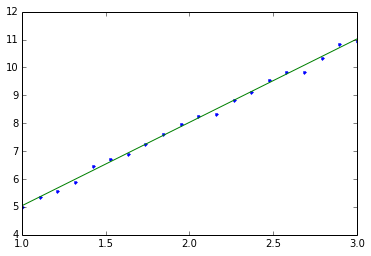

In [35]:
plt.plot(xs,ys, '.')


# def padAll(xs):
#     tmp = np.zeros((xs.size, 2))
#     tmp[:, 0] = 1.
#     tmp[:, 1] = xs
#     return tmp

def padAll(xs):
    tmp = np.zeros((xs.size, 2))
    for i in xrange(xs.size):
        tmp[i, 0] = 1.
        tmp[i, 1] = xs[i]
    return tmp

pxs = padAll(xs)

# def cost(ws):
#     guesses = np.dot(pxs, ws)
#     return np.sum((ys - guesses)**2)

def cost(ws):
    tmp = 0
    for i in xrange(xs.size):
        guess = (ws[0] * pxs[i][0]) + (ws[1] * pxs[i][1])
        tmp += (ys[i] - guess)**2
    return tmp


import scipy.optimize as opt
res = opt.fmin(cost, [0.,1.])  
print res
guesses = np.dot(pxs, res)
plt.plot(xs, guesses)

6) Why stop at one dimension. Here you are given a data set of house price(in million) given area, bed room and bath room. Find it in house price.csv.

Find the price for 45m^2 house with 2 bedroom and 2 bathroom.

Hint: `np.from_text` and use numpy array slicing will save you a lot of typing.

In [52]:
data = np.genfromtxt('house_price.csv', delimiter=',')
prices = data[:, 0]
features = data[:, 1:]

def padAll(ftr):
    row, col = ftr.shape
    tmp = np.zeros((row, col + 1))
    tmp[:, 0] = 1.
    tmp[:, 1:] = ftr
    return tmp

#print padAll(features)

padftr = padAll(features)
#print padftr

def cost(ws):
    guesses = np.dot(padftr, ws)
    return np.sum((prices - guesses)**2)


import scipy.optimize as opt
res = opt.fmin(cost, [1.,1.,1.,1.])  
print res

# plt.plot(guesses, prices, '.')

# def cost()

Optimization terminated successfully.
         Current function value: 0.928485
         Iterations: 283
         Function evaluations: 478
[ 0.3998773   0.10027504  0.30784073  0.12015975]


In [41]:
# ROC curve first? May be....

# Logistic Regression

1) Why is linear regression not suitable for predicting probabilities?

2) Consider logistic function

$$\theta(s) = \frac{1}{1+e^{-s}}$$

Find $f(\infty)$ and $f(-\infty)$ and just plot the function.

3) Show that $$\theta(-s) = 1 - \theta(s)$$

4) Combine logistic function and linear regression to make function that takes in a bunch of features and give out a probability. What parameters parametrize your models?

5) Given that you use hypothesis $$ P_\vec{w}(1 | \vec{x}) = \theta(\vec{w}\cdot\vec{x}) $$
and that you only 2 classes (+1 and -1) what is

$$ P_\vec{w}(-1 | \vec{x})$$

6) Use the fact from 3) write what you found in 5 in a simpler form

$$
P_\vec{w}(y|\vec{x}) = \begin{cases}
    \ldots & y = 1 \\
    \ldots & y = -1
\end{cases}
$$

7) Using the fact that $y\in\{-1, 1\}$Convince yourself that what you wrote above is just

$$ P_\vec{w}\left(y|\vec{x} \right) = \theta\left(y \times \left( \vec{w} \cdot \vec{x} \right) \right)$$

8) How do we distinguish a good hypothesis from bad hypothesis? (good $\vec{w}$ from bad $\vec{w}$)

9) What does likelihood represents?

10) Let us do one concrete example here.  Calculate the likelihood for $\vec{w}$ given these data point
$$\vec{w}_1 = (0,1,2)$$
- $y = 1$, $x=[1, -1]$
- $y = -1$, $x=[-2, 1]$ 

11) Is $\vec{w}_2 = (1,1,1)$ a better hypothesis?

12) What happend when we take log of the likelihood?

13) Write down our cost function.

14) What is the parameter that we are trying to adjust?

15) Look at gold_target data file and build a system to decide whether we should dig the gold or not.